# Vectorized String Operations & Date Time 

# Pivot Table

The pivot table takes simple column-wise data as input, and groups the
 entire into a 2D table that provides a multi dimensional summarization of the data.

pivot table is super usefull bhaut jageh dikhega yeah , pivot table shortcut offer krta hai 1 jishse thoda convinience hojata 

it is mostly used in categorical column

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 


In [3]:
# seaborn data visualization library hai 

df = sns.load_dataset('tips') # toy data set 
df.head() # restaurant ka dataset 


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Qs what is the average total bill as per geneder 

df.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [5]:
# now i also wnna know isme hie smoker kitna bill krte hai & non smoker kitna bill krte hai 

In [6]:
df.groupby(['sex','smoker'])['total_bill'].mean().unstack()

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


#### Same we can achive by using pivot table in a simple manner

df.pivot_table(index=' ',columns=' ',values=' ')

The pivot table takes simple column-wise data as input, and groups the
entire into a 2D table that provides a multi dimensional summarization of the data.


In [7]:
df.pivot_table(index='sex',columns='smoker',values='total_bill') # by default aggregate function is mean 

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [8]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [9]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [10]:
df.pivot_table(index='sex',columns='smoker') #value nahi diya tou sbhpe analysis krderaha 

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [11]:
df.pivot_table(index='sex',columns='smoker')['size']

smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [12]:
# Multidimensional 

df.pivot_table(index=['sex','smoker'], columns=['day','time'],values='total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [13]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [14]:
# margins=true karne pe  yeah total dedega 

df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [15]:
## Plotting Graph 
df =pd.read_csv('dataset/string_datetime/expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [16]:
df['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Yeah har date ke andar ghusske Month name extract krdega & batadega
df['month']=df['Date'].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<AxesSubplot: xlabel='month'>

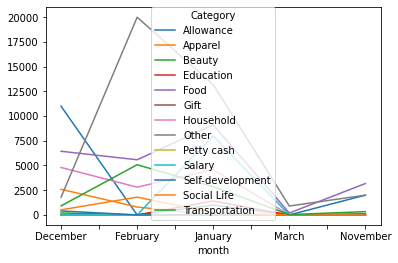

In [28]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<AxesSubplot: xlabel='month'>

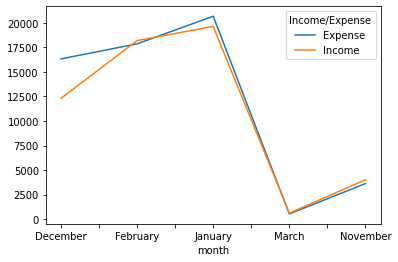

In [29]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<AxesSubplot: xlabel='month'>

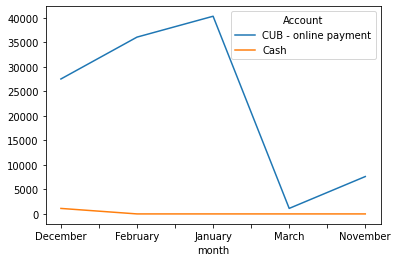

In [30]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()


# Vectorized String Operations

yeahsbh har jageh apply hoga jaha hume textual data dikhayi dega ya millega

### What are vectorized operations ?

-->  

In [32]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [34]:
a*4 # har item 4 kesath apply hoga 

array([ 4,  8, 12, 16])

above is the simple e.g of vectorized operation

###  startswith(''): string pe apply hota None pe apply nahi hota 
###  s.str.startswith('c') ishse hum but achive karsakte hai har chiz pandas pe 

In [43]:
# problem in vectorized operation in vanilla python 

s = ['cat','mat',None,'rat']
# [i.startswith('c') for i in s]

# None hai so yeah nahi chalega yaha 

In [46]:

# how Pandas solves this issue?

s = pd.Series(['cat','mat',None,'rat'])

# str : string accessor 
s.str.startswith('c')

# fast & optimized for larger dataset.

 


0     True
1    False
2     None
3    False
dtype: object

In [48]:
# importing titanic dataset 

df=pd.read_csv("dataset/string_datetime/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df['Name'].str.lower()
df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [53]:
df['Name'].str.capitalize()
df['Name'].str.title() # har word ka 1st letter capital

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [63]:
df['Name'].str.len()

# passenger jiska sbhka lamba naam hai 
df['Name'].str.len().max()
df['Name'].str.len() == 82
df['Name'][df['Name'].str.len() == 82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

strip : yeah NLP related projects vgera mai karte time kaam aata hai 

In [65]:
# strip basically saare unwanted spaces hatadeta hai 

"     Ankit     ".strip()

'Ankit'

In [66]:
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### split('',n=,expand= )
 hame ek dataset banana hai first col mai uska title then name then surname ese alag column banana hai 
 expand jo hai vo dataframe mai convert krke deta hai 
 n mai jo parameter pass karenge utne baar vo split karega 

In [84]:
# split 

# hame ek dataset banana hai first col mai uska title then name then surname ese alag column banana hai 

df['lastname']= df['Name'].str.split(',').str.get(0)
df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen


In [103]:
# naam alag column mai daalna hai 

df['Name'].str.split(',').str.get(1) 
# naam aagya bss abh & abh 
df['Name'].str.split(',').str.get(1).str.split(' ')
# shuru mai bhi space hai 

# strip krenge but bss 1st basis pe only fir isliye split(1) mai 1 daalna hai 
df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',1,expand=True)

,0,1
0,Mr.,Owen Harris
1,Mrs.,John Bradley (Florence Briggs Thayer)
2,Miss.,Laina
3,Mrs.,Jacques Heath (Lily May Peel)
4,Mr.,William Henry
...,...,...
886,Rev.,Juozas
887,Miss.,Margaret Edith
888,Miss.,"Catherine Helen ""Carrie"""
889,Mr.,Karl Howell


In [108]:
df[['title','firstname']]  = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ',1,expand=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)


In [109]:
df['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

### replace() 
yeah replace krdeta hai bss simple

In [111]:
df['title'] =df['title'].str.replace('Ms.','Miss.')
df['title'] =df['title'].str.replace('Mlle.','Miss.')

C:\Users\hp\AppData\Local\Temp/ipykernel_14568/1646101663.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] =df['title'].str.replace('Ms.','Miss.')
C:\Users\hp\AppData\Local\Temp/ipykernel_14568/1646101663.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] =df['title'].str.replace('Mlle.','Miss.')


In [112]:
df['title'].value_counts()

Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: title, dtype: int64

### filtering 



In [123]:
df[df['firstname'].str.startswith('A')]
df[df['firstname'].str.endswith('A')]

# isdigit / is alpha

# df[df['firstname'].str.isdigit()]
# df[df['firstname'].str.isalpha()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,Stewart,Mr.,Albert A
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Keane,Miss.,Nora A


### Advance Filtering using regex

In [131]:
# applying regex
# finding people who have john inside their name in any case lower or upper 

df[df['firstname'].str.contains('john',case=False)]

# find lastname that start with vowel or end with vowel 

df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


### Slicing 

In [136]:
df['Name'].str[::-1]
df['Name'].str[2:]

0                                  aund, Mr. Owen Harris
1      mings, Mrs. John Bradley (Florence Briggs Thayer)
2                                   ikkinen, Miss. Laina
3             trelle, Mrs. Jacques Heath (Lily May Peel)
4                                 len, Mr. William Henry
                             ...                        
886                                  ntvila, Rev. Juozas
887                           aham, Miss. Margaret Edith
888               hnston, Miss. Catherine Helen "Carrie"
889                                  hr, Mr. Karl Howell
890                                    oley, Mr. Patrick
Name: Name, Length: 891, dtype: object